In [1]:
%matplotlib inline

/Users/viraj/.virtualenvs/salmon/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


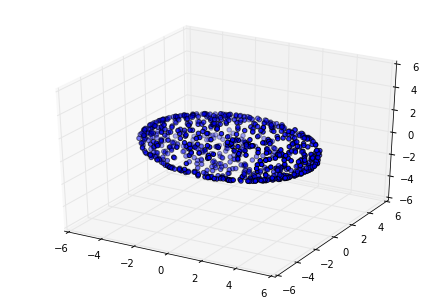

In [2]:
# generate a set of vector data with three principal components on x, y and z axes respectively
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from math import sqrt, copysign

N = 800        # number of vectors to generate
a = 5
b = 3.5
c = 2

# empty argument defaults to using time for seed
random.seed(time.time())

"""
Equation for 'squashed' football (ellipsoid) with long axis along x, fat axis along y and squashed axis along z:

1 = x*x/a/a + y*y/b/b + z*z/c/c, where a > b > c > 0

"""

def surface(n):
    A2 = a*a
    B2 = b*b
    C2 = c*c

    cloud = []
    idx = 0
    while idx in range(0,n):
        idx += 1
        x = random.uniform(-a, a)
        xa = 1 - x*x/A2
        x2 = b * sqrt(xa)
        y = random.uniform(-x2, x2)
        z = c * sqrt(xa - y*y/B2)
        if random.uniform(-1,1) < 0 :
            z = -z
        cloud.append((x,y,z))
    return cloud

# ripped from: http://stackoverflow.com/questions/21161884/plotting-a-3d-surface-from-a-list-of-tuples-in-matplotlib?rq=1

data = surface(N)
x, y, z = zip(*data)
z = map(float, z)
# grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
# grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim3d(-6,6)
ax.set_ylim3d(-6,6)
ax.set_zlim3d(-6,6)
ax.scatter(x,y,z)
plt.show()